# Author: Mohd Hasan Khan
#### Exploratory Data Analysis- Terrorism
#### GRIP @ The Sparks Foundation

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv(r"C:\Users\Lenovo\OneDrive\Documents\HasanPython Practice\Terrorism\dataset.csv",encoding='latin1', low_memory=False)
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [5]:
data.rename(columns={'iyear':'Year','imonth':"Month",'iday':'Day','gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City',
'latitude':'Latitude','longitude':'Longitude','summary':'Summary','attacktype1_txt':'AttackType','targtype1_txt':'TargetType','weaptype1_txt':'Weapon','nkill':'Kill','nwound':'Wound'}, inplace=True)

In [6]:
data=data[['Year','Month','Day','Country','State','City','Region','Latitude','Longitude','AttackType','TargetType','Kill','Wound','target1','Summary','Group','Weapon','motive']]
data

,Year,Month,Day,Country,State,City,Region,Latitude,Longitude,AttackType,TargetType,Kill,Wound,target1,Summary,Group,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Santo Domingo,Central America & Caribbean,18.456792,-69.951164,Assassination,Private Citizens & Property,1.0,0.0,Julio Guzman,NaN,MANO-D,Unknown,NaN
1,1970,0,0,Mexico,Federal,Mexico city,North America,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Unknown,Southeast Asia,15.478598,120.599741,Assassination,Journalists & Media,1.0,0.0,Employee,NaN,Unknown,Unknown,NaN
3,1970,1,0,Greece,Attica,Athens,Western Europe,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),NaN,NaN,U.S. Embassy,NaN,Unknown,Explosives,NaN
4,1970,1,0,Japan,Fukouka,Fukouka,East Asia,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),NaN,NaN,U.S. Consulate,NaN,Unknown,Incendiary,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Middle Shebelle,Ceelka Geelow,Sub-Saharan Africa,2.359673,45.385034,Armed Assault,Military,1.0,2.0,Checkpoint,12/31/2017: Assailants opened fire on a Somali...,Al-Shabaab,Firearms,NaN
181687,2017,12,31,Syria,Lattakia,Jableh,Middle East & North Africa,35.407278,35.942679,Bombing/Explosion,Military,2.0,7.0,Hmeymim Air Base,12/31/2017: Assailants launched mortars at the...,Muslim extremists,Explosives,NaN
181688,2017,12,31,Philippines,Maguindanao,Kubentog,Southeast Asia,6.900742,124.437908,Facility/Infrastructure Attack,Private Citizens & Property,0.0,0.0,Houses,12/31/2017: Assailants set fire to houses in K...,Bangsamoro Islamic Freedom Movement (BIFM),Incendiary,NaN
181689,2017,12,31,India,Manipur,Imphal,South Asia,24.798346,93.940430,Bombing/Explosion,Government (General),0.0,0.0,Office,12/31/2017: Assailants threw a grenade at a Fo...,Unknown,Explosives,NaN


In [7]:
data.shape

(181691, 18)

In [8]:
data.dtypes

Year            int64
Month           int64
Day             int64
Country        object
State          object
City           object
Region         object
Latitude      float64
Longitude     float64
AttackType     object
TargetType     object
Kill          float64
Wound         float64
target1        object
Summary        object
Group          object
Weapon         object
motive         object
dtype: object

In [9]:
data.isnull().sum()

Year               0
Month              0
Day                0
Country            0
State            421
City             434
Region             0
Latitude        4556
Longitude       4557
AttackType         0
TargetType         0
Kill           10313
Wound          16311
target1          636
Summary        66129
Group              0
Weapon             0
motive        131130
dtype: int64

In [10]:
data['Wound']=data['Wound'].fillna(0)
data['Kill']=data['Kill'].fillna(0)
data['Casualities']=data['Wound']+data['Kill']

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   State        181270 non-null  object 
 5   City         181257 non-null  object 
 6   Region       181691 non-null  object 
 7   Latitude     177135 non-null  float64
 8   Longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  TargetType   181691 non-null  object 
 11  Kill         181691 non-null  float64
 12  Wound        181691 non-null  float64
 13  target1      181055 non-null  object 
 14  Summary      115562 non-null  object 
 15  Group        181691 non-null  object 
 16  Weapon       181691 non-null  object 
 17  motive       50561 non-null   object 
 18  Casualities  181691 non-

In [12]:
data.describe()

,Year,Month,Day,Latitude,Longitude,Kill,Wound,Casualities
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


Text(0.5, 1.0, 'Attacks in Year')

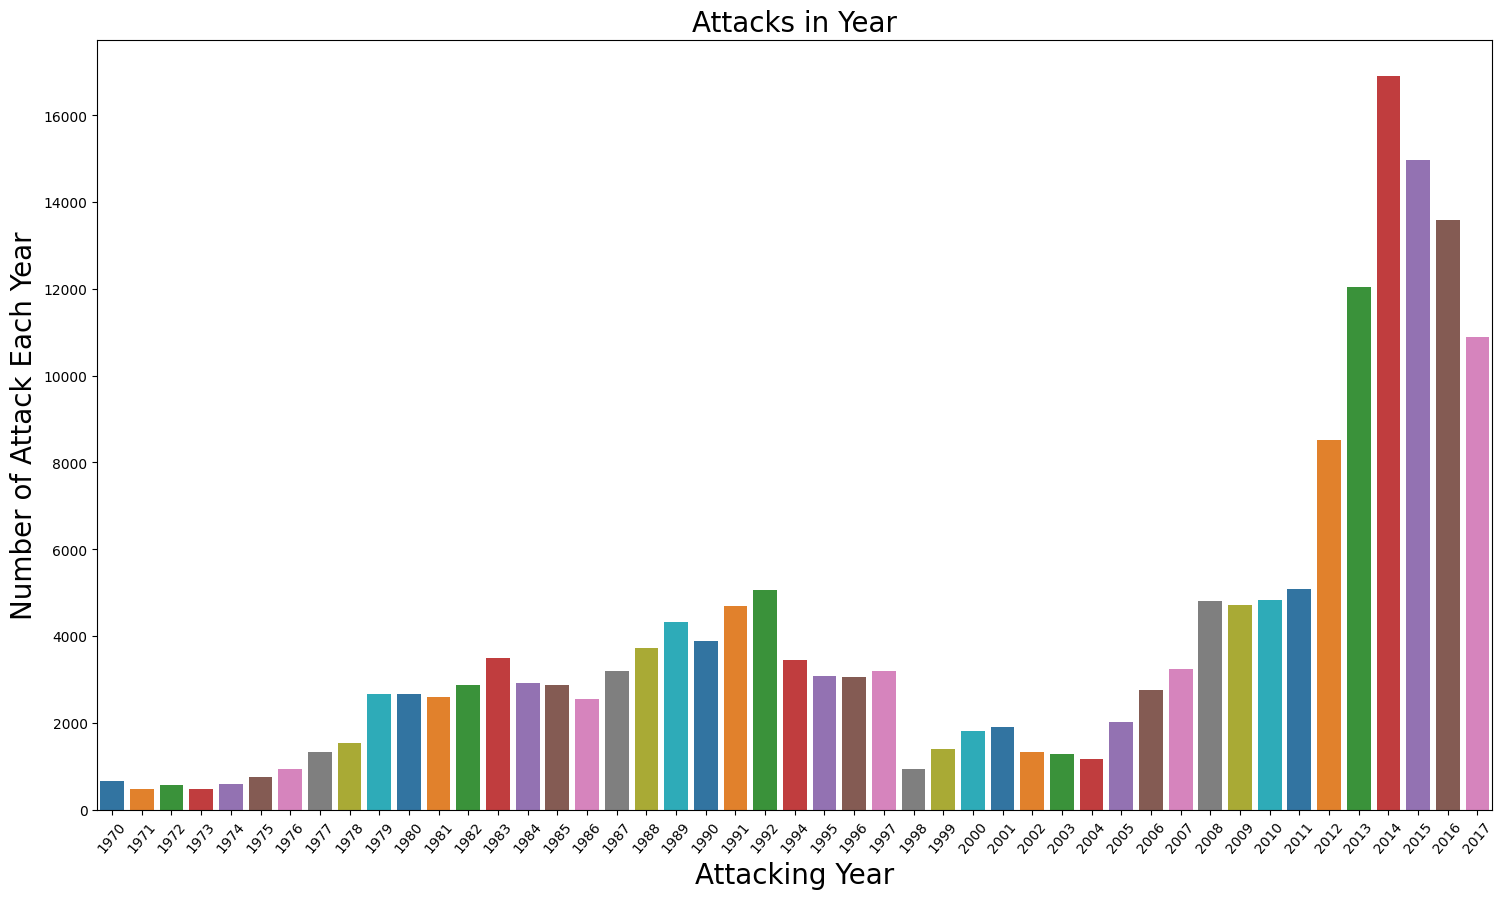

In [13]:
year=data['Year'].unique()
year_counts=data['Year'].value_counts(dropna=False).sort_index()
plt.figure(figsize=(18,10))
sns.barplot(x=year,y=year_counts, palette='tab10')
plt.xticks(rotation=50)
plt.xlabel("Attacking Year", fontsize=20)
plt.ylabel("Number of Attack Each Year", fontsize=20)
plt.title("Attacks in Year", fontsize=20)

Text(0.5, 1.0, 'Terrorist Activities By Region In Each Year')

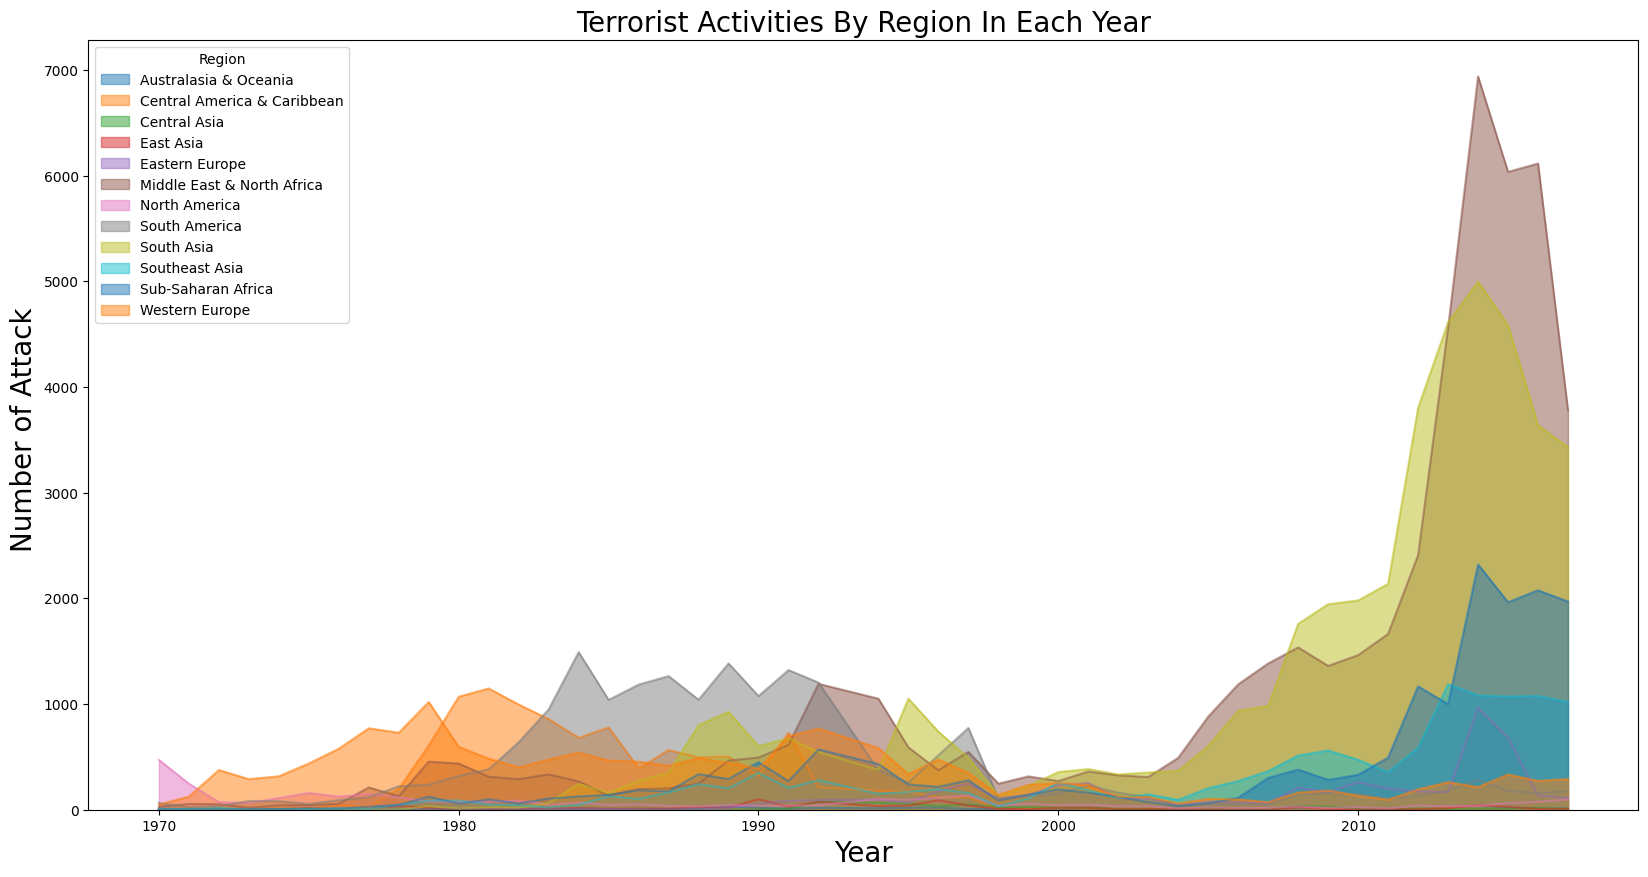

In [14]:
pd.crosstab(data.Year, data.Region).plot(kind="area",stacked=False, figsize=(20,10))
plt.xlabel("Year", fontsize=20)
plt.ylabel("Number of Attack ", fontsize=20)
plt.title("Terrorist Activities By Region In Each Year", fontsize=20)

In [15]:
attack=data.Country.value_counts()[:10]
attack

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

In [16]:
data.Group.value_counts()[1:10]

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Name: Group, dtype: int64

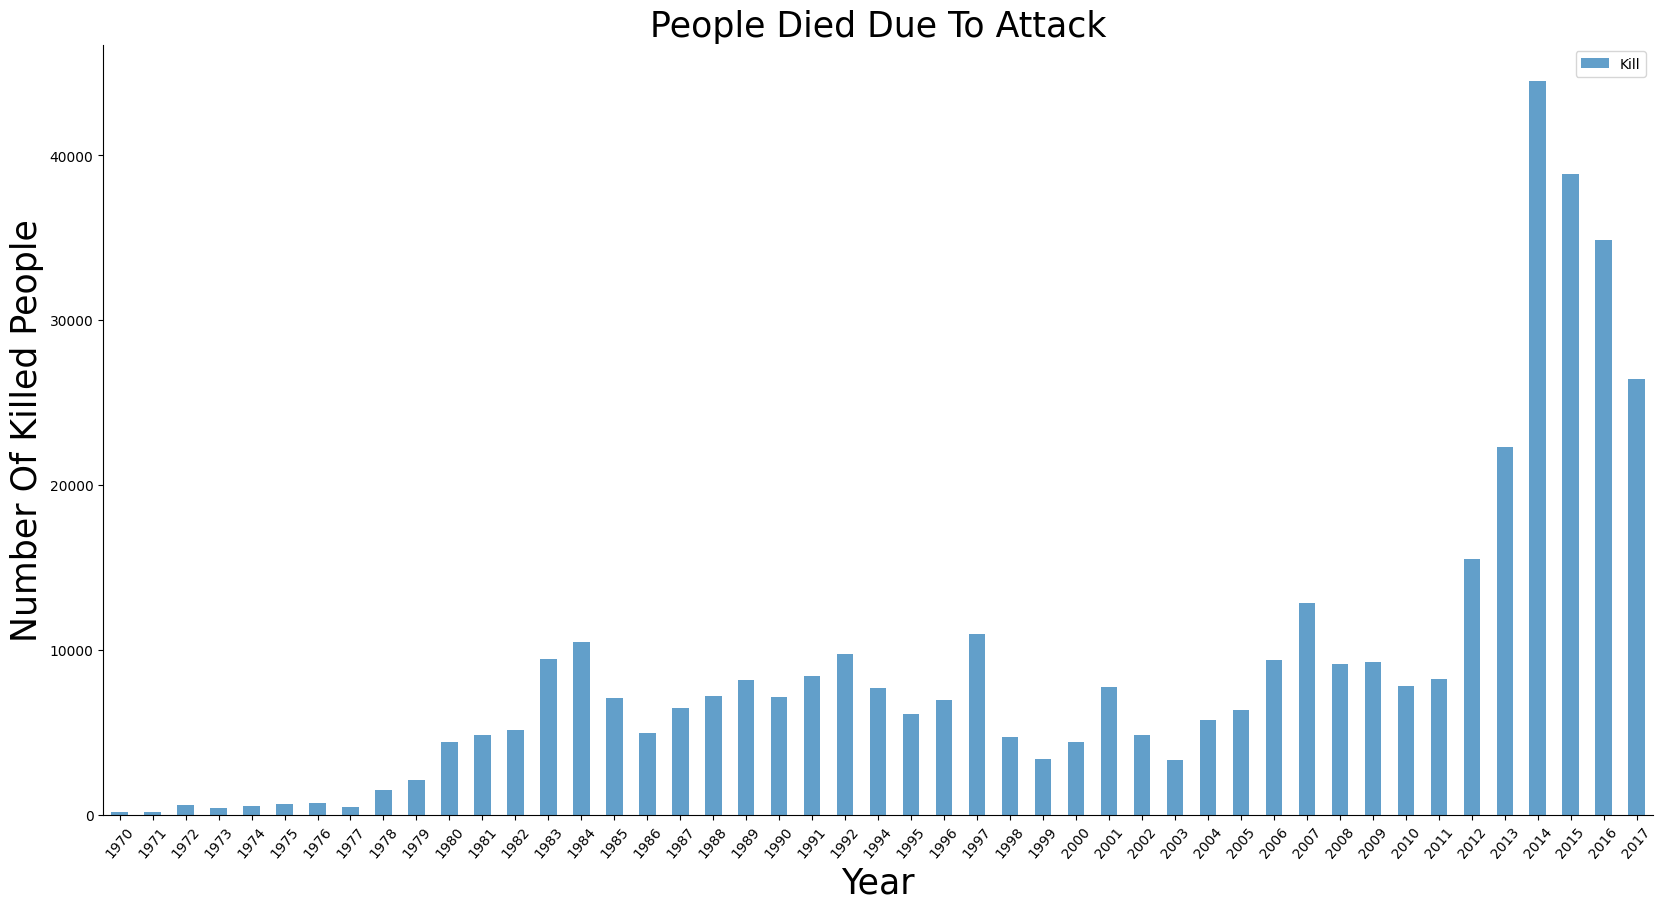

In [17]:
df=data[['Year','Kill']].groupby(['Year']).sum()
fig, ax4=plt.subplots(figsize=(20,10))
df.plot(kind='bar',alpha=0.7,ax=ax4)
plt.xticks(rotation=50)
plt.title("People Died Due To Attack", fontsize=25)
plt.xlabel('Year',fontsize=25)
plt.ylabel("Number Of Killed People",fontsize=25)
top_side=ax4.spines['top']
top_side.set_visible(False)
right_side=ax4.spines['right']
right_side.set_visible(False)

Text(0.5, 1.0, 'Top 10 Most Effected City')

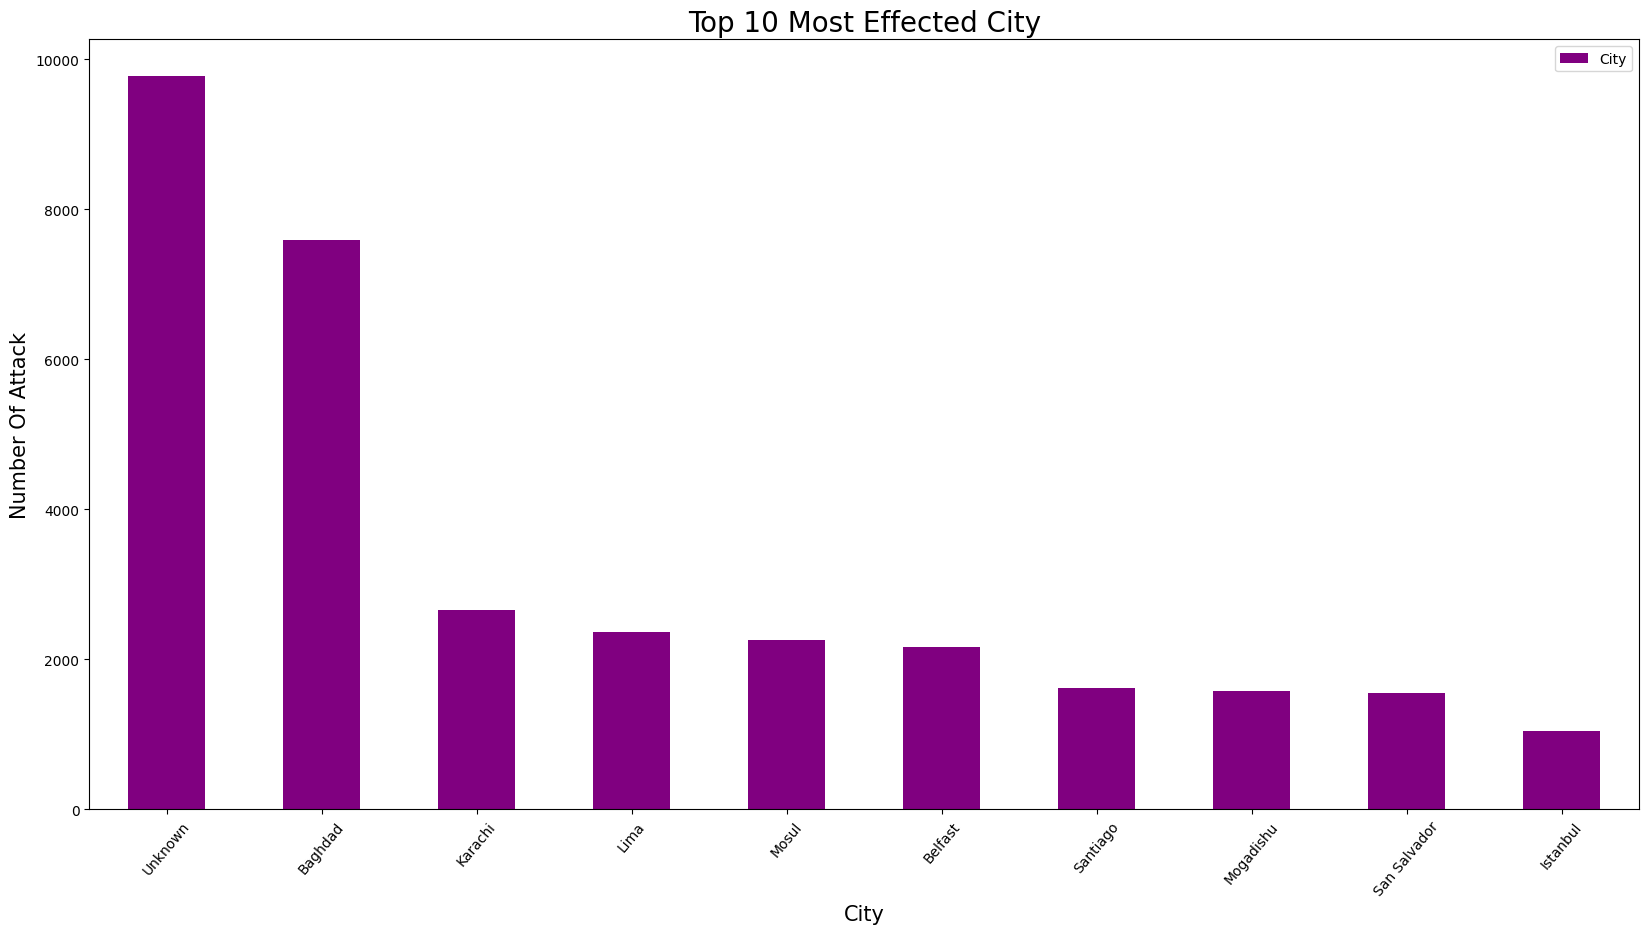

In [18]:
data["City"].value_counts().to_frame().sort_values('City', axis=0, ascending=False).head(10).plot(kind='bar', figsize=(20,10),color='purple')
plt.xticks(rotation=50)
plt.xlabel("City", fontsize=15)
plt.ylabel("Number Of Attack", fontsize=15)
plt.title("Top 10 Most Effected City",fontsize=20)

Text(0.5, 1.0, 'Name Of AttackType')

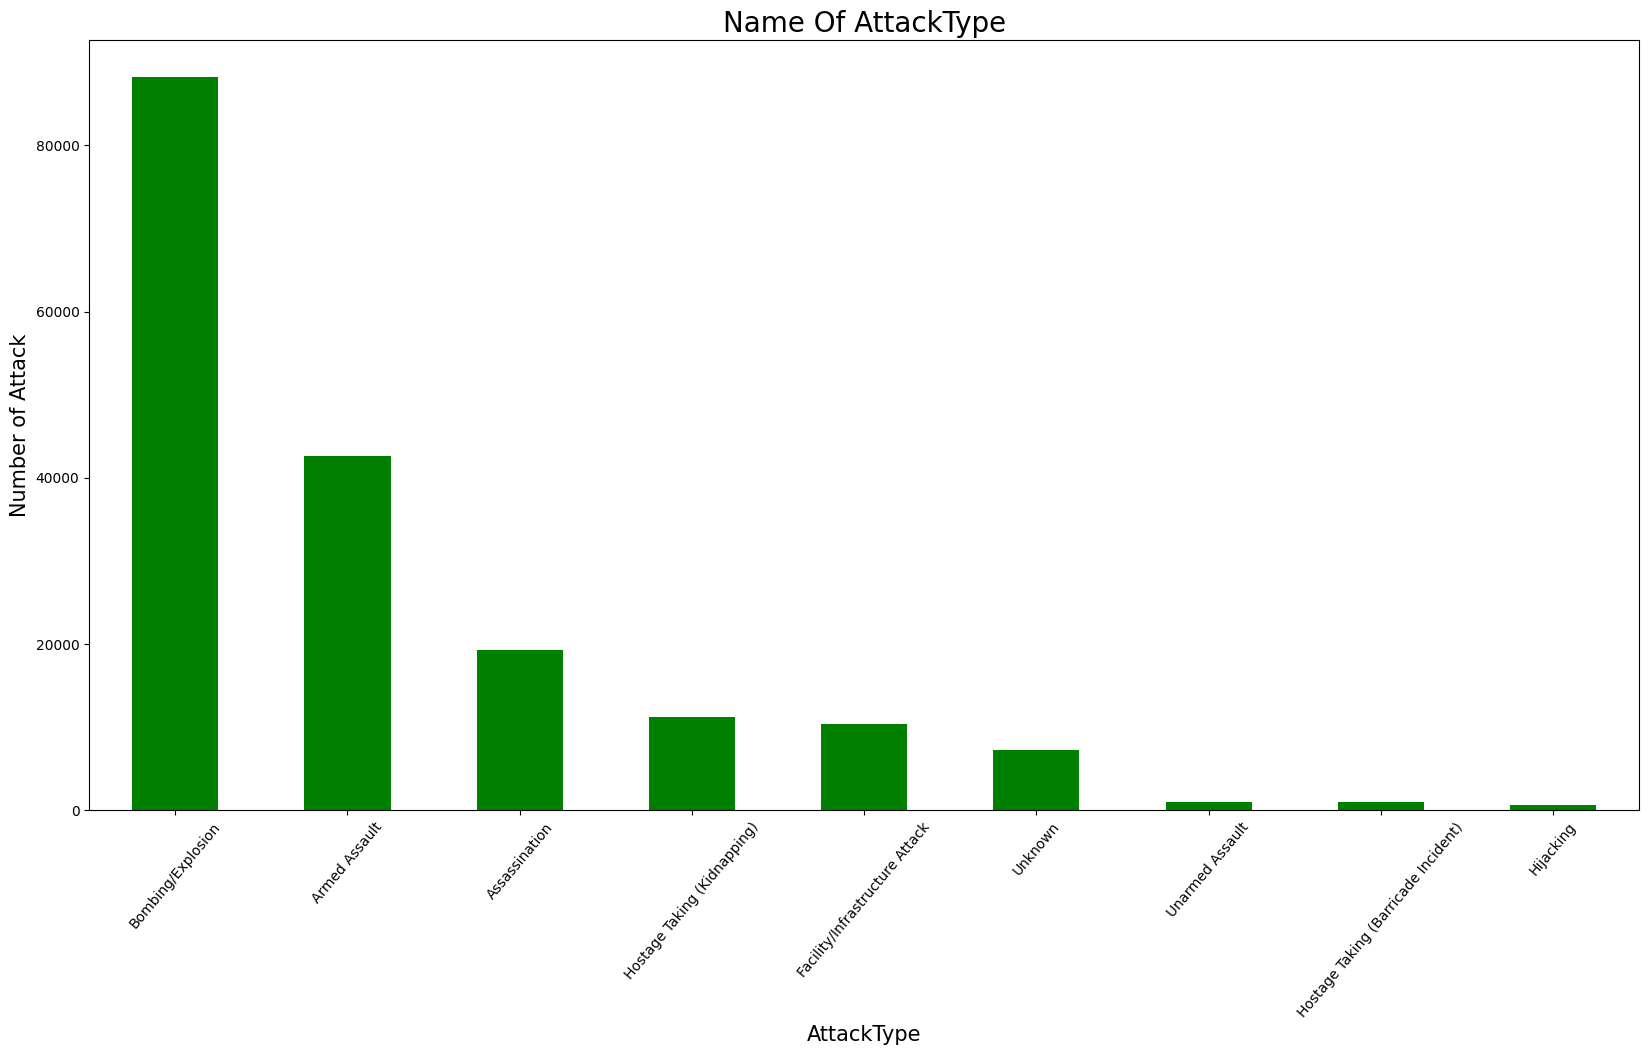

In [19]:
data["AttackType"].value_counts().plot(kind='bar',figsize=(20,10), color="Green")
plt.xticks(rotation=50)
plt.xlabel("AttackType", fontsize=15)
plt.ylabel("Number of Attack", fontsize=15)
plt.title("Name Of AttackType", fontsize=20)



Text(0, 0.5, 'Number of people')

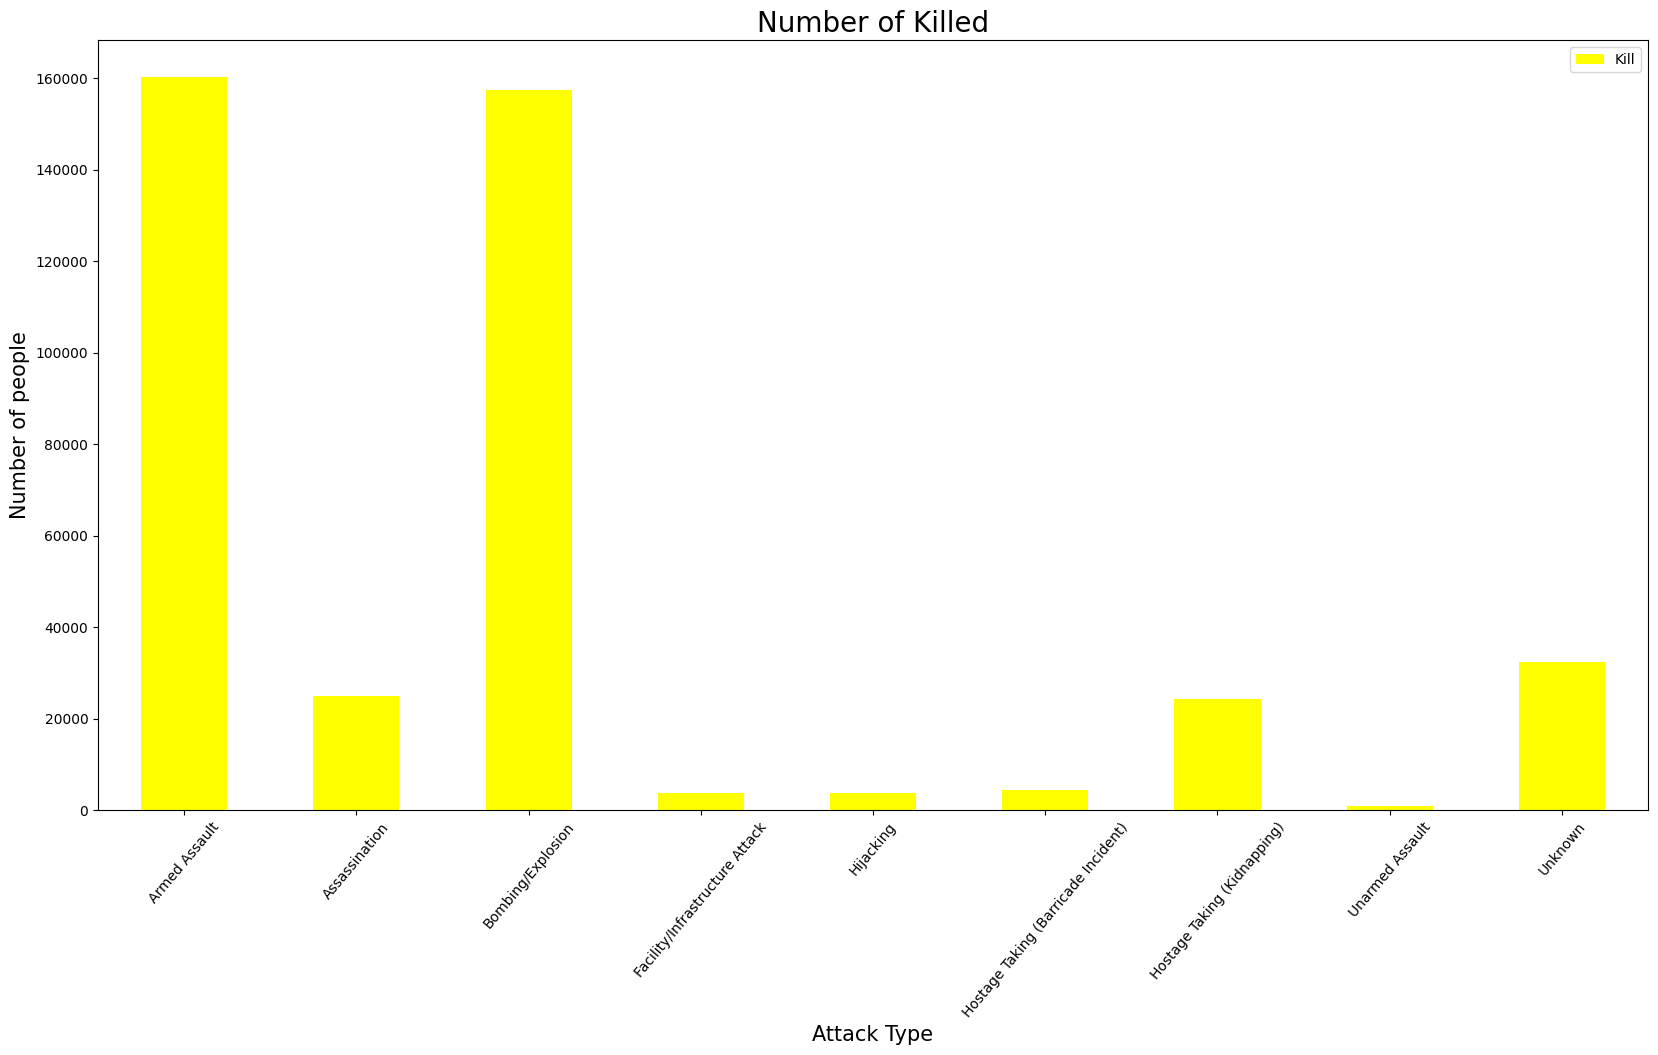

In [20]:
data[["AttackType", "Kill"]].groupby(['AttackType'], axis=0).sum().plot(kind='bar',figsize=(20,10), color="yellow")
plt.xticks(rotation=50)
plt.title("Number of Killed", fontsize=20)
plt.xlabel("Attack Type", fontsize=15)
plt.ylabel("Number of people", fontsize=15)

Text(0.5, 1.0, 'Number Of Wounded')

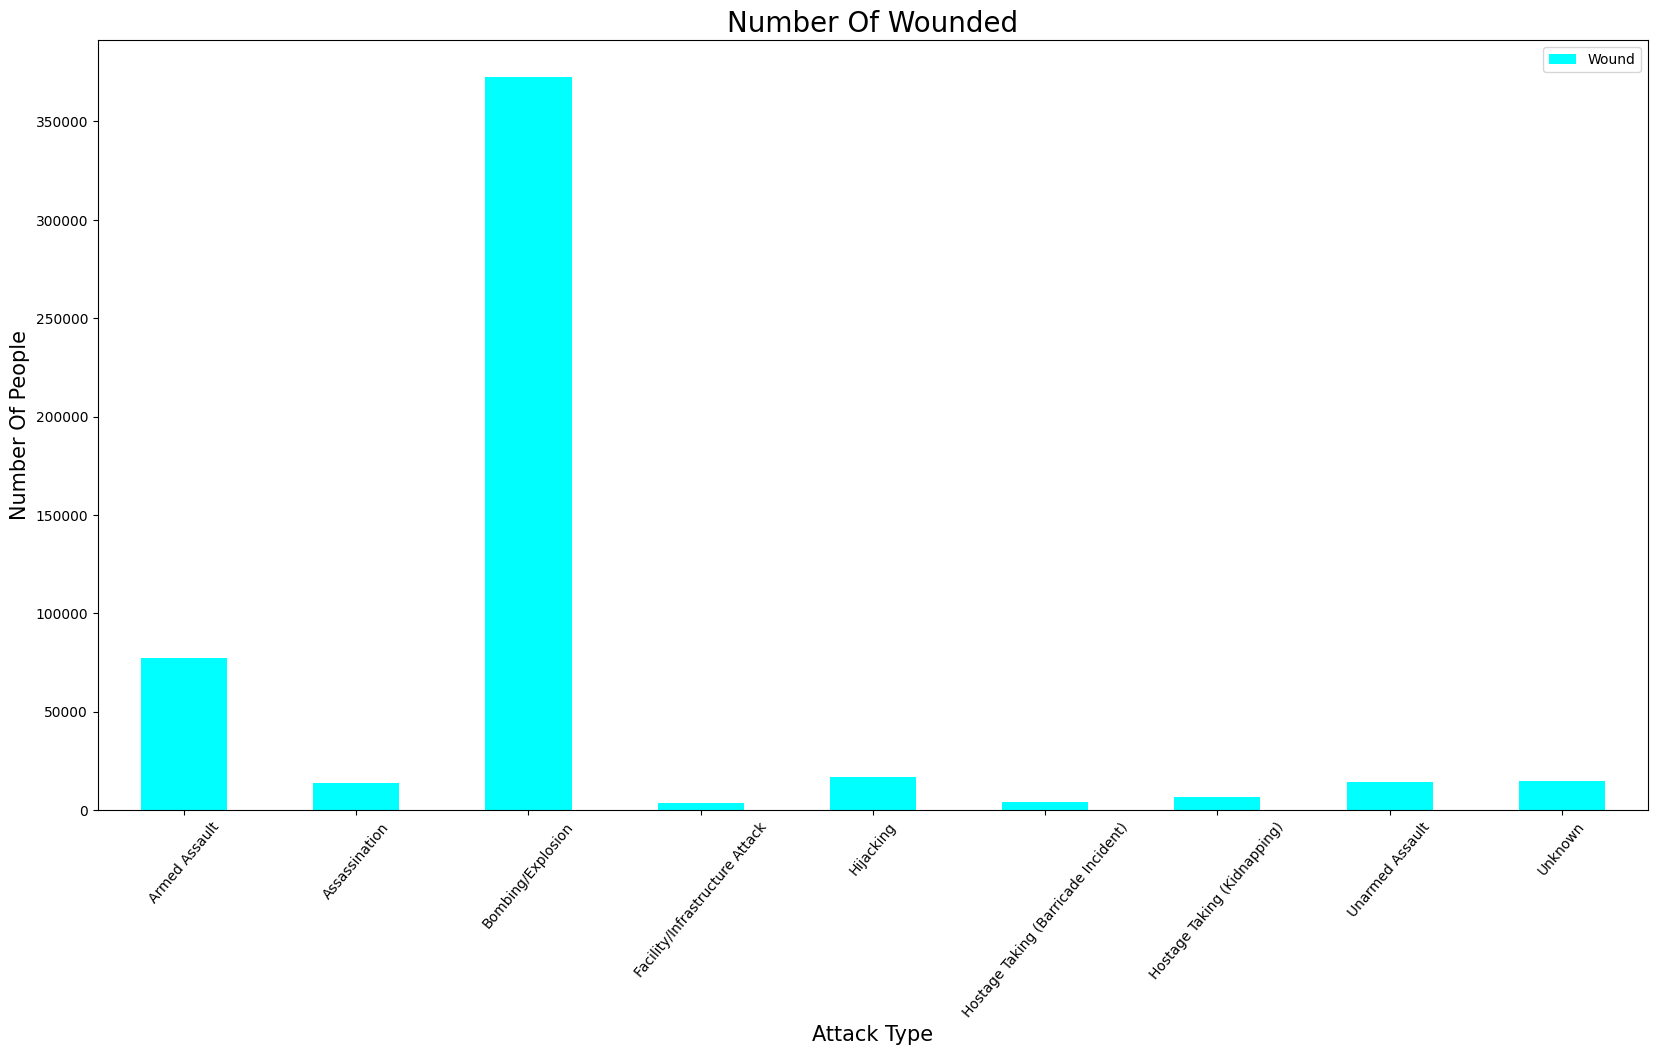

In [25]:
data[["AttackType","Wound"]].groupby(["AttackType"], axis=0).sum().plot(kind='bar',figsize=(20,10), color="cyan")
plt.xticks(rotation=50)
plt.xlabel("Attack Type", fontsize=15)
plt.ylabel("Number Of People", fontsize=15)
plt.title("Number Of Wounded", fontsize=20)

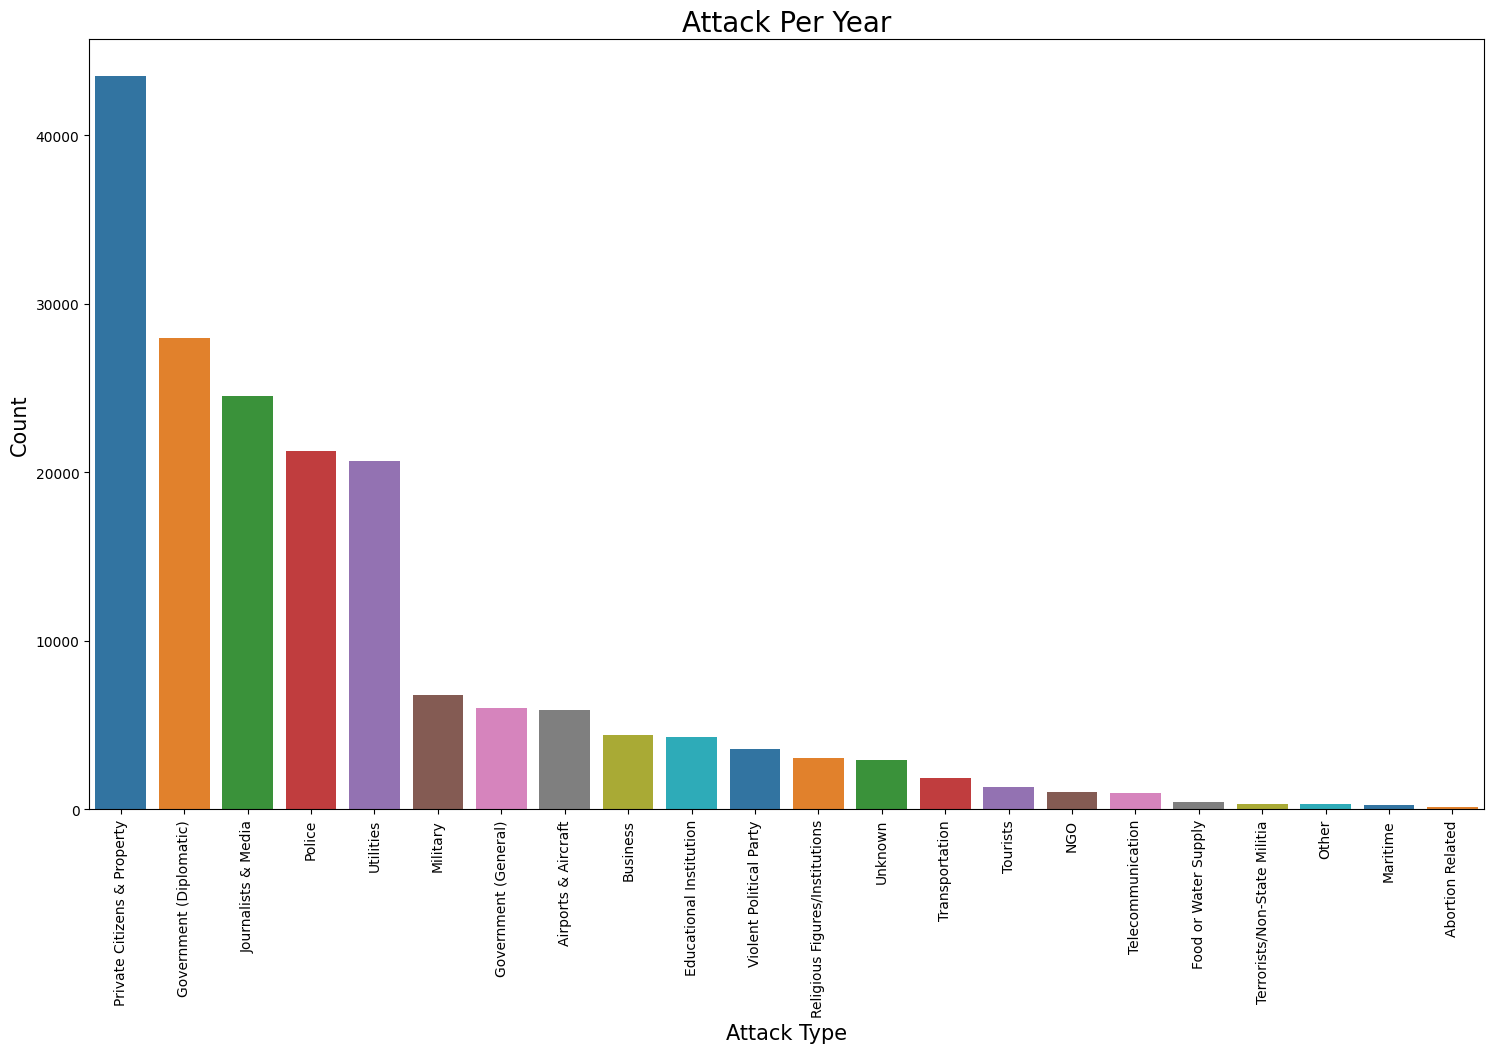

In [30]:
k=data['TargetType'].unique()
l=data['TargetType'].value_counts()
plt.figure(figsize=(18,10))
sns.barplot(x=k,y=l, palette='tab10')
plt.xticks(rotation=90)
plt.xlabel("Attack Type", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Attack Per Year", fontsize=20)
plt.show()

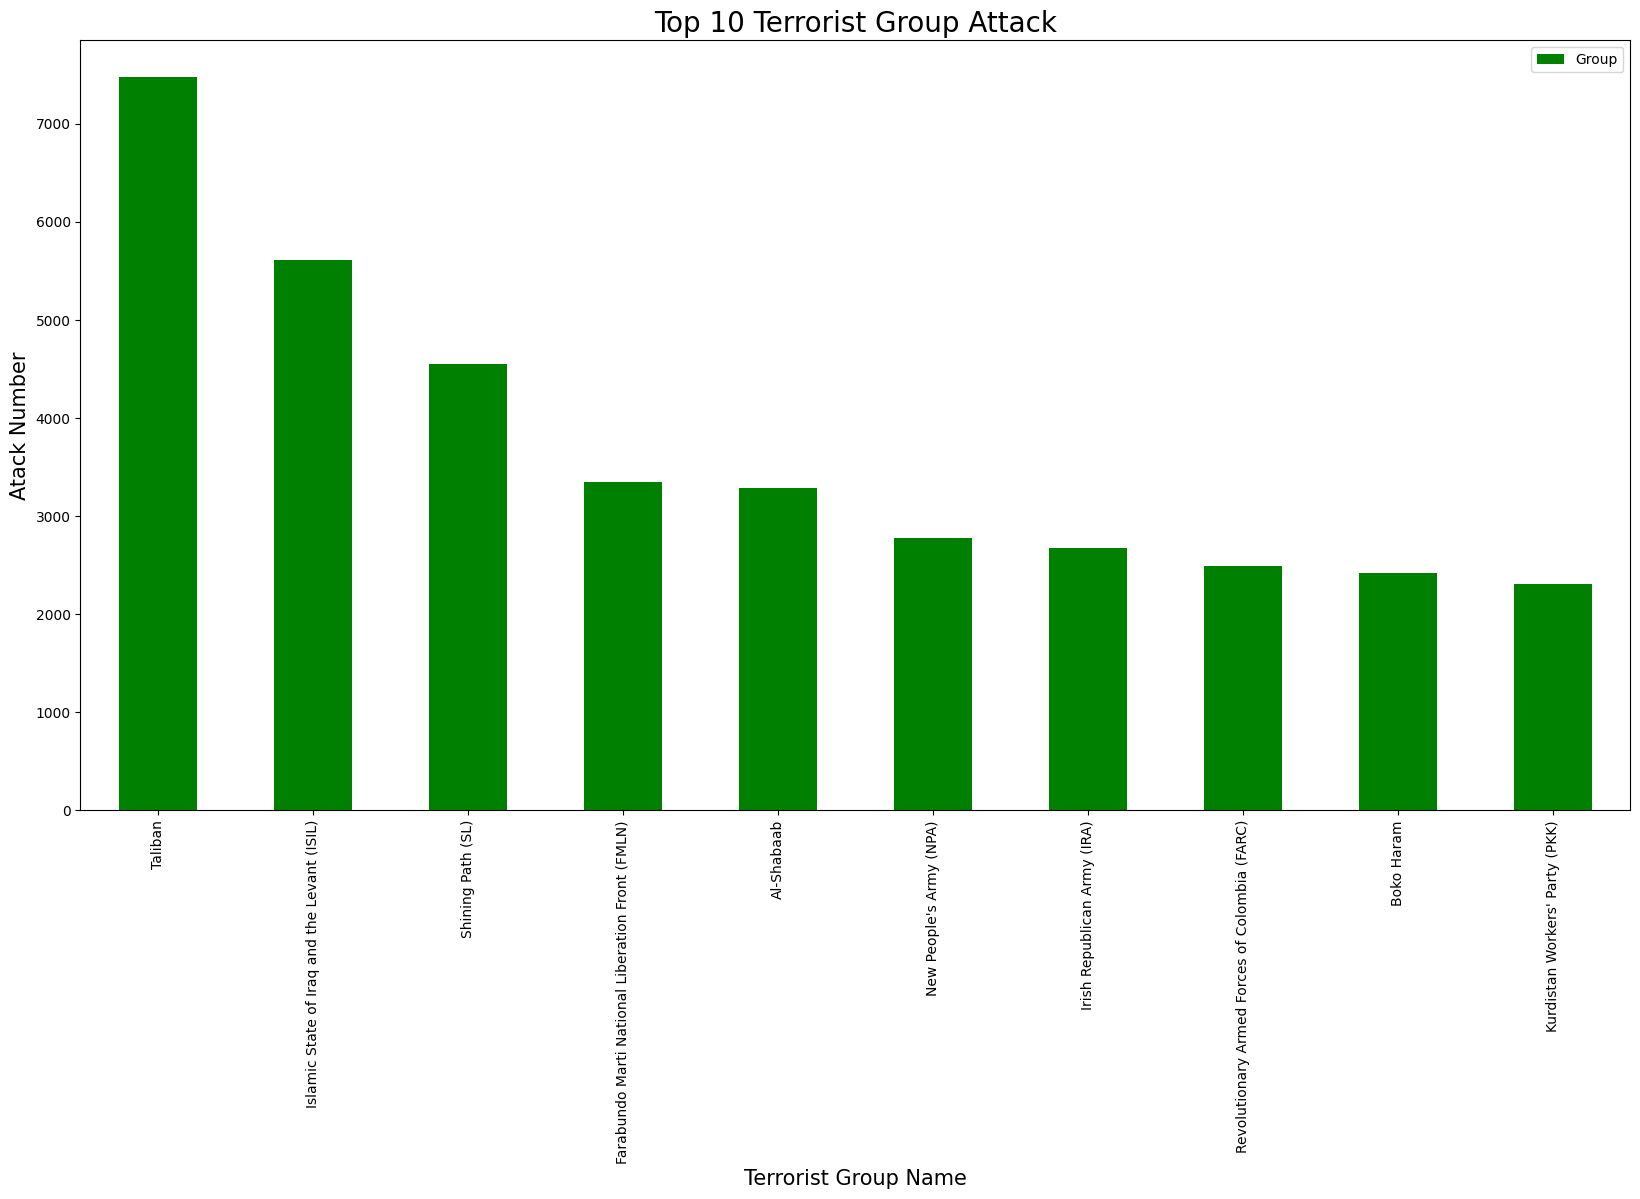

In [36]:
data['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar', color='green', figsize=(20,10))
plt.xlabel("Terrorist Group Name", fontsize=15)
plt.ylabel("Atack Number", fontsize=15)
plt.title("Top 10 Terrorist Group Attack", fontsize=20)
plt.show()

Text(0, 0.5, 'Number Of Killed People')

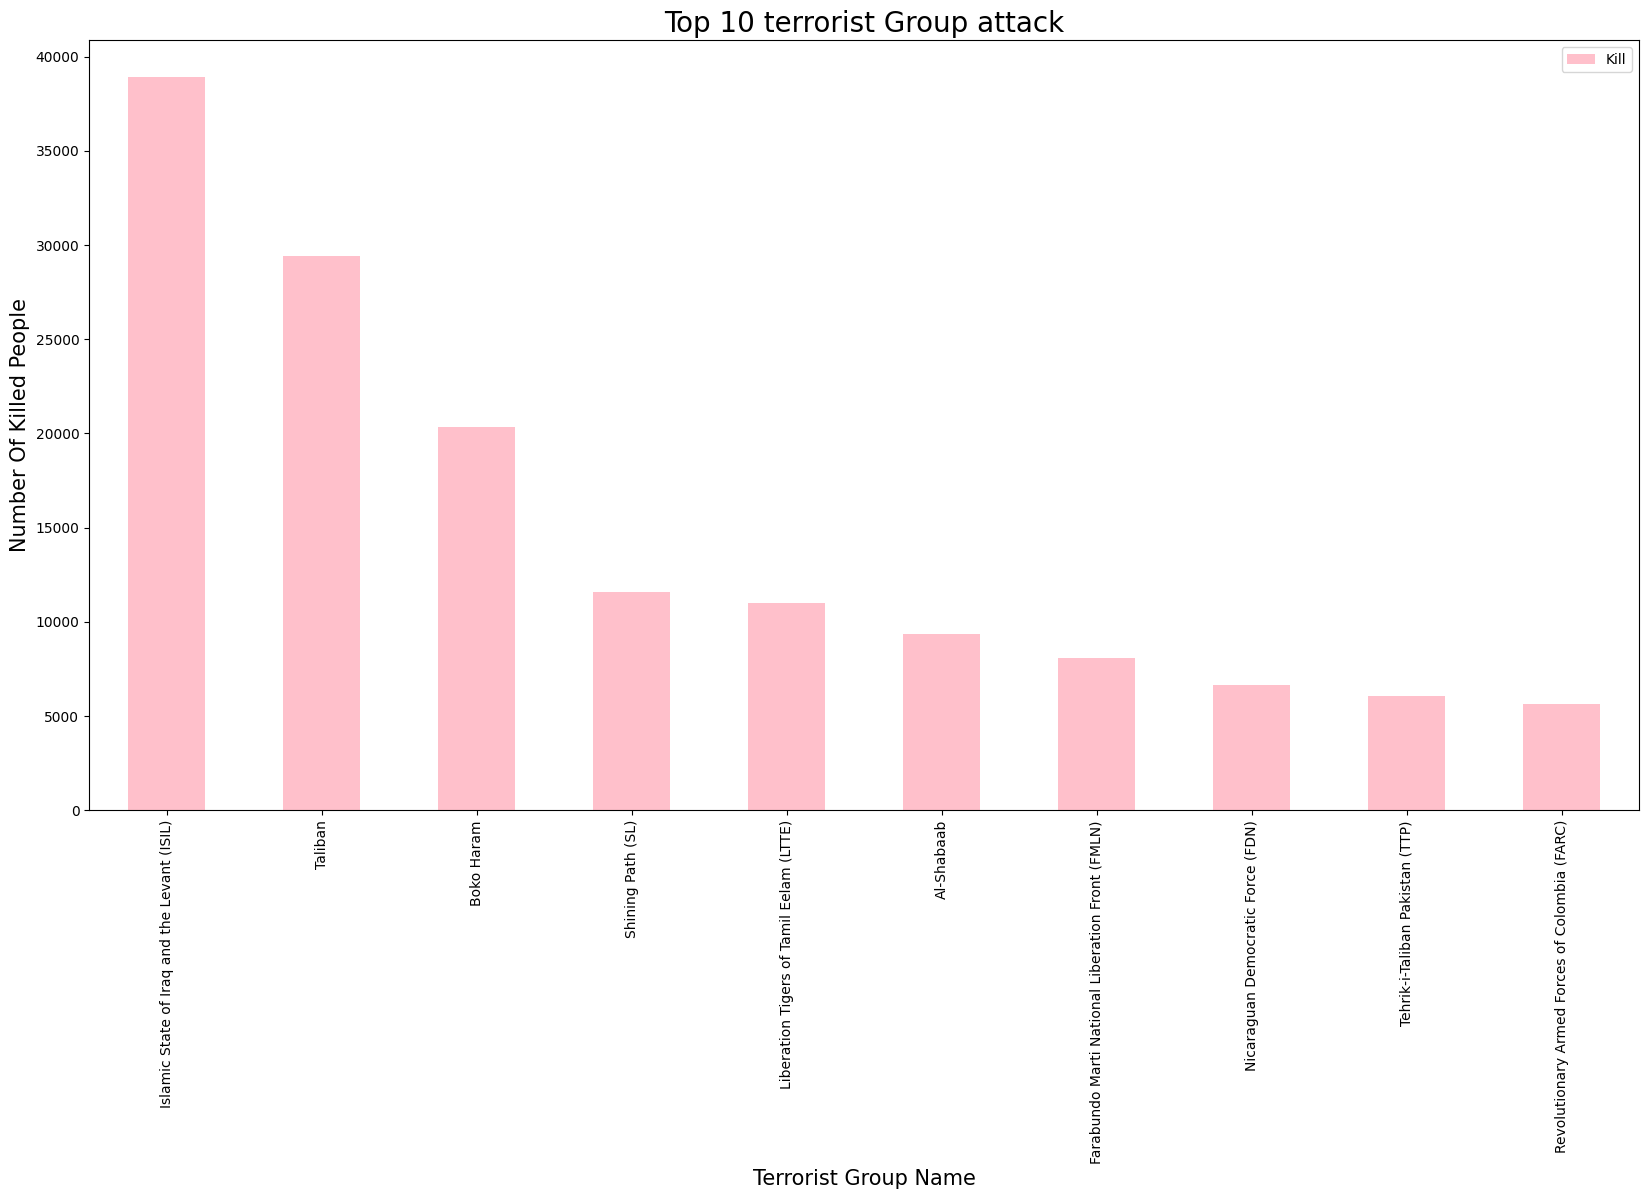

In [39]:
data[['Group','Kill']].groupby(['Group'], axis=0).sum().drop('Unknown').sort_values('Kill',ascending=False).head(10).plot(kind='bar',color='pink', figsize=(20,10))
plt.title("Top 10 terrorist Group attack", fontsize=20)
plt.xlabel("Terrorist Group Name", fontsize=15)
plt.ylabel("Number Of Killed People", fontsize=15)                              

In [40]:
df=data[['Group','Country','Kill']]
df=df.groupby(['Group','Country'], axis=0).sum().sort_values('Kill', ascending=False).drop('Unknown').reset_index().head()
df

,Group,Country,Kill
0,Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0
1,Taliban,Afghanistan,29269.0
2,Boko Haram,Nigeria,16917.0
3,Shining Path (SL),Peru,11595.0
4,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0


In [41]:
kill=data.loc[:,'Kill']
print("Number of People Killed By Terror attack:", int(sum(kill.dropna())))

Number of People Killed By Terror attack: 411868


## Conclusion
##### 1- Country with the most Attack: Iraq
##### 2- City with the most Attack: Baghdad
##### 3- Region with the most Attack: Middle East and North Africa
##### 4- Year with the most attack: 2014
##### 5- Month with the most Attack: 5
##### 6- Group with the most Attack: Taliban
##### 7- Most Attack types: Bombing/Explosion
